In [177]:
import math
import json
from tqdm import tqdm
from itertools import groupby
import torch
from torch.utils.data import DataLoader
from transformers import AutoTokenizer
from datasets import load_dataset
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import precision_recall_curve, roc_curve, auc

In [116]:
generations = torch.load("results/Generations/Generations_EleutherAI-pythia-70m-deduped_step98000_check_data-pileval_train_dl.pt_k=50_m=50_N=1000_S=0_seed=229_extract/Generations_EleutherAI-pythia-70m-deduped_step98000_check_data-pileval_train_dl.pt_k=50_m=50_N=1000_S=0_seed=229_extract_generations.pt")
ground_truth = torch.load("results/Generations/Generations_EleutherAI-pythia-70m-deduped_step98000_check_data-pileval_train_dl.pt_k=50_m=50_N=1000_S=0_seed=229_extract/Generations_EleutherAI-pythia-70m-deduped_step98000_check_data-pileval_train_dl.pt_k=50_m=50_N=1000_S=0_seed=229_extract_true.pt")
generations_statistics = torch.load("results/LOSS/LOSS_EleutherAI-pythia-70m-deduped_step98000_N=1000_S=0_seed=229_extract/LOSS_EleutherAI-pythia-70m-deduped_step98000_N=1000_S=0_seed=229_extract_gen_statistics.pt")
ground_truth_statistics = torch.load("results/LOSS/LOSS_EleutherAI-pythia-70m-deduped_step98000_N=1000_S=0_seed=229_extract/LOSS_EleutherAI-pythia-70m-deduped_step98000_N=1000_S=0_seed=229_extract_true_statistics.pt")
probabilities = torch.load("results/Generations/Generations_EleutherAI-pythia-70m-deduped_step98000_check_data-pileval_train_dl.pt_k=50_m=50_N=1000_S=0_seed=229_extract/Generations_EleutherAI-pythia-70m-deduped_step98000_check_data-pileval_train_dl.pt_k=50_m=50_N=1000_S=0_seed=229_extract_probabilities.pt")
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-70m-deduped")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


/tmp/ipykernel_1734535/2036587056.py:206: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Exact Match Accuracy (Precision): 0.007
Token Level Accuracy (Hamming): 0.04962
Any Exact Match Accuracy (Multiprecision): 0.007
Highest Token Level Accuracy (Multihamming): 0.06182
Average Proportion of Generations True Suffix is Better Than (Distinguishability Given Generated): 0.058
True Suffix is Best (Accuracy Given Generated): 0.036
Recall at 100 errors 0.007


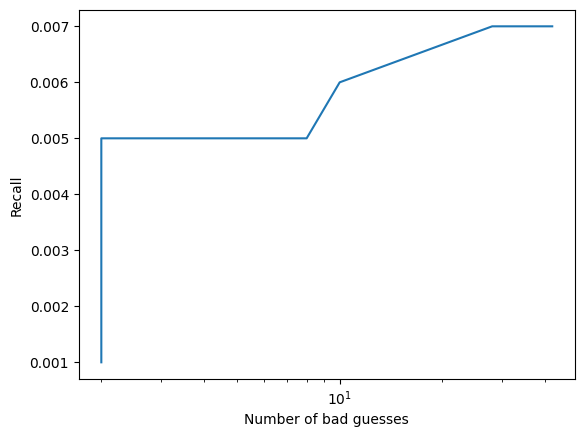

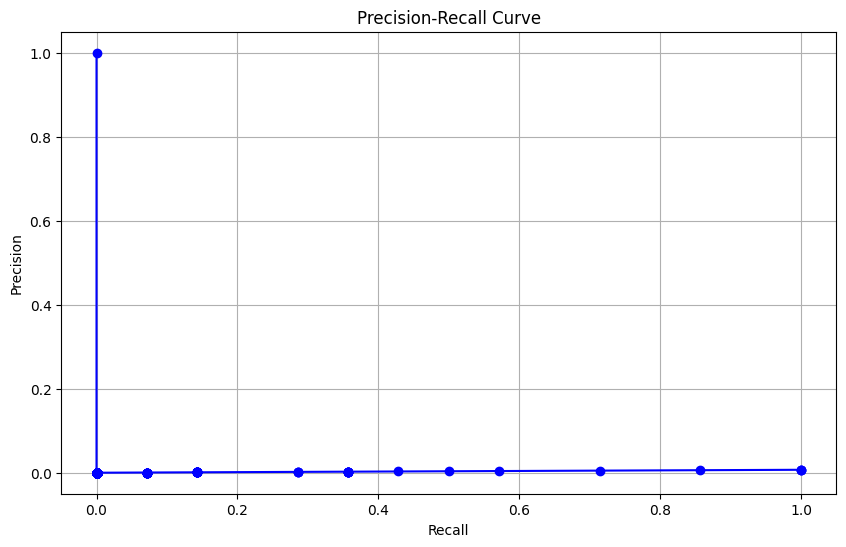

,original_index,generation_index,exact_match,token_match,ground_truth_loss,generation_loss,prefix,ground_truth_suffix_text,generation_suffix_text,ground_truth_suffix_tokens,generation_suffix_tokens
0,540,1,False,0.98,0.151953,0.137017,/*\n * Licensed to the Apache Software Foundat...,"\n * to you under the Apache License, Version ...","\n * to you under the Apache License, Version ...","[187, 475, 281, 368, 762, 253, 14325, 4637, 13...","[187, 475, 281, 368, 762, 253, 14325, 4637, 13..."
1,540,0,False,0.98,0.151953,0.154843,/*\n * Licensed to the Apache Software Foundat...,"\n * to you under the Apache License, Version ...","\n * to you under the Apache License, Version ...","[187, 475, 281, 368, 762, 253, 14325, 4637, 13...","[187, 475, 281, 368, 762, 253, 14325, 4637, 13..."
2,597,1,True,1.00,0.200130,0.200130,/*\nCopyright 2017 The Kubernetes Authors.\n\n...,\n\n http://www.apache.org/licenses/LICENSE...,\n\n http://www.apache.org/licenses/LICENSE...,"[535, 50274, 2413, 1358, 2700, 15, 8418, 15, 2...","[535, 50274, 2413, 1358, 2700, 15, 8418, 15, 2..."
3,597,0,True,1.00,0.200130,0.200130,/*\nCopyright 2017 The Kubernetes Authors.\n\n...,\n\n http://www.apache.org/licenses/LICENSE...,\n\n http://www.apache.org/licenses/LICENSE...,"[535, 50274, 2413, 1358, 2700, 15, 8418, 15, 2...","[535, 50274, 2413, 1358, 2700, 15, 8418, 15, 2..."
4,29,0,True,1.00,0.203215,0.203215,/*\nCopyright The Kubernetes Authors.\n\nLicen...,http://www.apache.org/licenses/LICENSE-2.0...,http://www.apache.org/licenses/LICENSE-2.0...,"[50274, 2413, 1358, 2700, 15, 8418, 15, 2061, ...","[50274, 2413, 1358, 2700, 15, 8418, 15, 2061, ..."
...,...,...,...,...,...,...,...,...,...,...,...
1995,778,0,False,0.08,6.096067,4.116508,Newspaper Page Text\n\nfclscllea\nLsran'i mj. ...,"""""'"" 2\nCUW;......... 27\nColum"" 124\n' 133\nV...","uOi, Ib.\nd-l-l-l-l -l l -i mj, i.\nt-l-l-l\nt...","[9739, 21288, 374, 187, 18094, 56, 28, 22833, ...","[86, 48, 74, 13, 309, 67, 15, 187, 69, 14, 77,..."
1996,470,1,False,0.04,4.398856,4.140645,Catching Back Up With Steve Earle\n\nSteve Ear...,".\n\nAnd as the song goes, if you think I’m ha...",from the back of the room!\n\nMike and I will...,"[15, 187, 187, 1898, 347, 253, 4498, 4566, 13,...","[432, 253, 896, 273, 253, 2316, 2, 187, 187, 2..."
1997,249,0,False,0.04,4.421192,4.152597,FILED\n\nJUL 2 5 20111\nUNITED STATES DISTRICT...,"ERINE GRAHAM, )\n)\nPlaintiff, )\n)\nv. ) Civi...","OLIC L. CIVIL JURY, UNITED STATES DISTRICT COU...","[947, 7570, 443, 5214, 41, 2300, 13, 2387, 187...","[3271, 1864, 418, 15, 330, 3252, 3077, 500, 33..."
1998,222,0,False,0.06,5.766831,4.202012,jap fam?ly nud?sm\n\nxxxxxxxporn sax com Man o...,the whole story now!\n\nsex bite tit sex porn...,you guys? xxxx\n\nxxxxxxxporn sony fuck\n\nxx...,"[253, 2644, 2926, 1024, 2, 187, 187, 11523, 18...","[368, 6068, 32, 1269, 25887, 187, 187, 16321, ..."


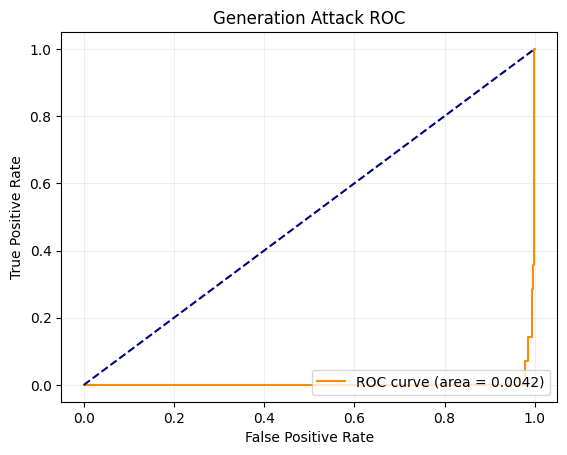

In [200]:
def compute_extraction_metrics(ground_truth,generations,ground_truth_statistics,generations_statistics,prefix_length,suffix_length,tokenizer,title=None,statistic_name=None,ground_truth_probabilities=None):
    """
    Computes all extraction metrics
    """
    num_samples = ground_truth.shape[0]
    num_generations = generations.shape[1]
    # Get best generation for each sample
    axis0 = np.arange(num_samples)
    axis1 = generations_statistics.argmin(1).reshape(-1)

    datadict = {}
    # Statistics
    datadict |= {f"ground_truth_{statistic_name}": ground_truth_statistics}
    datadict |= {f"best_generation_{statistic_name}": generations_statistics[axis0,axis1].tolist()}
    datadict |= {f"generations_{i}_{statistic_name}": generations_statistics[:,i] for i in range(num_generations)}
    # Text
    datadict |= {"prefix": [tokenizer.decode(ground_truth[row,:prefix_length]).replace("\n","\\n") for row in range(num_samples)]}
    datadict |= {"ground_truth_suffix_text": [tokenizer.decode(ground_truth[row,-suffix_length:]).replace("\n","\\n") for row in range(num_samples)]}
    datadict |= {"best_generation_suffix_text": [tokenizer.decode(row).replace("\n","\\n") for row in generations[axis0,axis1,-suffix_length:]]}
    datadict |= {f"generations_{i}_suffix_text": [tokenizer.decode(generations[row,i,-suffix_length:]).replace("\n","\\n") for row in range(num_samples)] for i in range(num_generations)}
    # Tokens
    datadict |= {"ground_truth_suffix_tokens": ground_truth[:,-suffix_length:].tolist()}
    datadict |= {"best_generation_suffix_tokens": generations[axis0,axis1,-suffix_length:].tolist()}
    datadict |= {f"generations_{i}_suffix_tokens": generations[:,i,-suffix_length:].tolist() for i in range(num_generations)}

    df = pd.DataFrame(datadict)

    # Compute Metrics
    df["exact_match"] = df["ground_truth_suffix_tokens"]==df["best_generation_suffix_tokens"]
    df["token_match"] = [(np.array(df["ground_truth_suffix_tokens"][row])==np.array(df["best_generation_suffix_tokens"][row])).mean() for row in range(num_samples)]
    df["any_exact_match"] = df.apply(lambda row: any(row[f"generations_{i}_suffix_tokens"] == row["ground_truth_suffix_tokens"] for i in range(num_generations)), axis=1)
    df["highest_token_match"] = df.apply(lambda row: max((np.array(row["ground_truth_suffix_tokens"]) == np.array(row[f"generations_{i}_suffix_tokens"])).mean() for i in range(num_generations)), axis=1)
    df["ground_truth_better_than"] = df.apply(lambda row: sum(row[f"ground_truth_{statistic_name}"] <= row[f"generations_{i}_{statistic_name}"] for i in range(num_generations)) / num_generations, axis=1)
    df["ground_truth_best"] = df['ground_truth_better_than']==1
    if ground_truth_probabilities is not None:
        df["ground_truth_suffix_probability"] = ground_truth_probabilities
    df = df[df.columns[(np.arange(len(df.columns))-(6 if ground_truth_probabilities is None else 7))%len(df.columns)]]

    metrics = {
        "precision": df['exact_match'].mean(),
        "hamming": df['token_match'].mean(),
        "multiprecision": df['any_exact_match'].mean(),
        "multihamming": df['highest_token_match'].mean(),
        "betterthan": df['ground_truth_better_than'].mean(),
        "best": df['ground_truth_best'].mean(),
    }

    print(f"Exact Match Accuracy (Precision): {metrics['precision']:.4g}")
    print(f"Token Level Accuracy (Hamming): {metrics['hamming']:.4g}")
    print(f"Any Exact Match Accuracy (Multiprecision): {metrics['multiprecision']:.4g}")
    print(f"Highest Token Level Accuracy (Multihamming): {metrics['multihamming']:.4g}")
    print(f"Average Proportion of Generations True Suffix is Better Than (Distinguishability Given Generated): {metrics['betterthan']:.4g}")
    print(f"True Suffix is Best (Accuracy Given Generated): {metrics['best']:.4g}")

    # Write to files
    ## Full CSV
    df.to_csv(f"{title}_full.csv",index=False)
    ## More human-legible json
    with open(f"{title}_records.json","w") as f:
        f.write(
            df.astype(
                {'ground_truth_suffix_tokens':'str','best_generation_suffix_tokens':'str'}|{f'generations_{i}_suffix_tokens':'str' for i in range(num_generations)}
            ).to_json(orient="records",lines=False,indent=4)
        )
    
    # Flattened version for overall ranking
    rows = []
    rows_with_ground_truth = []
    for idx, row in df.iterrows():
        for i in range(num_generations):
            new_row = {
                "original_index": idx,
                "generation_index": i,
                "exact_match": row["exact_match"],
                "token_match": row["token_match"],
                f"ground_truth_{statistic_name}": row[f"ground_truth_{statistic_name}"],
                f"generation_{statistic_name}": row[f"generations_{i}_{statistic_name}"],
                "prefix": row["prefix"],
                "ground_truth_suffix_text": row["ground_truth_suffix_text"],
                "generation_suffix_text": row[f"generations_{i}_suffix_text"],
                "ground_truth_suffix_tokens": row["ground_truth_suffix_tokens"],
                "generation_suffix_tokens": row[f"generations_{i}_suffix_tokens"],
            }
            rows.append(new_row)
            rows_with_ground_truth.append(new_row)
        # Also append ground truth
        rows_with_ground_truth.append({
            "original_index": idx,
            "generation_index": -1,
            "exact_match": 1.,
            "token_match": 1.,
            f"ground_truth_{statistic_name}": row[f"ground_truth_{statistic_name}"],
            f"generation_{statistic_name}": row[f"ground_truth_{statistic_name}"],
            "prefix": row["prefix"],
            "ground_truth_suffix_text": row["ground_truth_suffix_text"],
            "generation_suffix_text": row["ground_truth_suffix_text"],
            "ground_truth_suffix_tokens": row["ground_truth_suffix_tokens"],
            "generation_suffix_tokens": row["ground_truth_suffix_text"],
        })
    flattened_df = pd.DataFrame(rows).sort_values(by=f"generation_{statistic_name}").reset_index(drop=True)
    flattened_df.to_csv(f"{title}_flattened.csv",index=False)

    # Error-recall
    did_solve = np.zeros(num_samples)
    recall = []
    errors = []
    bad_guesses = 0
    answer = None
    for exid, is_correct in zip(flattened_df["original_index"],flattened_df["exact_match"]):
        if is_correct:
            did_solve[int(exid)] = 1
            recall.append(np.mean(did_solve))
            errors.append(bad_guesses)
            if bad_guesses < 100:
                answer = np.mean(did_solve)
        else:
            bad_guesses += 1
    print("Recall at 100 errors", answer)
            
    plt.plot(errors, recall)

    plt.semilogx()
    plt.xlabel("Number of bad guesses")
    plt.ylabel("Recall")

    # Precision-recall curve using scikit-learn
    precision, recall, _ = precision_recall_curve(flattened_df["exact_match"], flattened_df[f"generation_{statistic_name}"])
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, marker='o', linestyle='-', color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid(True)
    plt.show()

    # ROC-AUC curve
    fpr, tpr, thresholds = roc_curve(flattened_df["exact_match"], flattened_df[f"generation_{statistic_name}"])
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.grid(which="both",alpha=0.2)
    plt.title("Generation Attack ROC")
    plt.legend(loc="lower right")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    flattened_df_w_true = pd.DataFrame(rows_with_ground_truth).sort_values(by=f"generation_{statistic_name}")
    flattened_df_w_true.to_csv(f"{title}_flattened_w_true.csv",index=False)

    ## Metrics json
    with open(f"{title}_metrics.json","w") as f:
        json.dump(metrics,f,indent=4)

    return flattened_df

compute_extraction_metrics(
    ground_truth=torch.tensor(ground_truth),
    generations=torch.tensor(generations),
    ground_truth_statistics=ground_truth_statistics,
    generations_statistics=generations_statistics,
    ground_truth_probabilities=probabilities,
    prefix_length=50,
    suffix_length=50,
    tokenizer=tokenizer,
    title="test",
    statistic_name="loss",
)

In [ ]:
    # # Print best guesses based on losses stat, with corresponding base_losses stat for each one
    # with open(f"{title}_best_guesses.txt","w") as f:
    #     for row in range(num_samples):
    #         prefix = tokenizer.decode(ground_truth[row,:prefix_length])
    #         guess = tokenizer.decode(best_suffixes[row])
    #         suffix = tokenizer.decode(ground_truth[row,-suffix_length:])
    #         f.write(f"Example {row}\n")
    #         f.write("Prefix: "+prefix.replace("\n","")+"\n")
    #         f.write("Suffix: "+suffix.replace("\n","")+"\n")
    #         f.write("Guess: "+guess.replace("\n","")+"\n\n")
    #         f.write(f"{statistic_name}: {generations_statistics[row][axis1[row]]}\n")

    # # Now I want to print all guesses with corresponding info
    # with open(f"{title}_all_guesses.txt","w") as f:
    #     for row in range(num_samples):
    #         prefix = tokenizer.decode(ground_truth[row,:prefix_length])
    #         suffix = tokenizer.decode(ground_truth[row,-suffix_length:])
    #         f.write(f"Example {row}\n")
    #         f.write("Prefix: "+prefix.replace("\n","")+"\n\n")
    #         f.write("Suffix: "+suffix.replace("\n","")+"\n\n")
    #         for j in range(num_generations):
    #             genstr = tokenizer.decode(generations[row, j, -suffix_length:])
    #             f.write(f"Guess {j}: "+genstr.replace("\n","")+"\n\n")
    #             f.write(f"{statistic_name}: {generations_statistics[row][j]}\n")
    #         f.write("\n")
    
    # # Write csv with the following format: 
    # # samp_num, gen_num, loss, base_loss, prefix_tok, prefix_str, guess_suffix_tok, guess_suffix_str, true_suffix_tok, true_suffix_str, hamming (0 to 1)
    # with open(f"{title}_all_info.tsv", "w") as f:
    #     f.write(f"samp_num\tgen_num\t{name1}\t{name2}\t\"prefix_tok\"\t\"prefix_str\"\t\"guess_suffix_tok\"\t\"guess_suffix_str\"\t\"true_suffix_tok\"\t\"true_suffix_str\"\thamming0to1\ttrue_suffix_prob\n")
    #     for samp_num in range(len(prefixes)):
    #         prefix_tok = list(prefixes[samp_num])
    #         prefix_str = tokenizer.decode(prefixes[samp_num]).replace("\n", "[newline]").replace("\t", "[tab]").replace("    ", "[tab]")
    #         true_suffix_tok = list(suffixes[samp_num])
    #         true_suffix_str = tokenizer.decode(suffixes[samp_num]).replace("\n", "[newline]").replace("\t", "[tab]").replace("    ", "[tab]")
    #         for gen_num in range(n_iterations):
    #             guess_suffix_tok = list(generations[samp_num, gen_num, -suffix_length:])
    #             guess_suffix_str = tokenizer.decode(guess_suffix_tok).replace("\n", "[newline]").replace("\t", "[tab]").replace("    ", "[tab]")
    #             loss = losses[samp_num][gen_num]
    #             base_loss = base_losses[samp_num][gen_num]
    #             # print(f"Guess Suffix: {guess_suffix_tok}")
    #             # print(f"True Suffix: {true_suffix_tok}")
    #             hamming_dist = sum(g == t for g, t in zip(guess_suffix_tok, true_suffix_tok)) / suffix_length
    #             f.write(f"{samp_num}\t{gen_num}\t{loss}\t{base_loss}\t\"{prefix_tok}\"\t\"{prefix_str}\"\t\"{guess_suffix_tok}\"\t\"{guess_suffix_str}\"\t\"{true_suffix_tok}\"\t\"{true_suffix_str}\"\t{hamming_dist}\t{probabilities[samp_num] if probabilities is not None else np.nan}\n")


In [ ]:

    # Error-recall curve
    # cumulative_errors = np.cumsum(flattened_df["exact_match"] == 0).to_numpy()
    # cumulative_correct = np.cumsum(flattened_df["exact_match"] == 1).to_numpy()
    # total_correct = cumulative_correct[-1]
    # accuracy = cumulative_correct / np.arange(1,len(cumulative_correct)+1)
    # recall = cumulative_correct / total_correct
    # error_rate = cumulative_errors # / np.arange(1, len(flattened_df) + 1)
    # plt.figure(figsize=(10, 6))
    # plt.plot(error_rate, accuracy, marker='o', linestyle='-')
    # plt.xlabel('Number of Errors')
    # plt.ylabel('Accuracy')
    # plt.title('Error-Accuracy Curve')
    # plt.grid(True)
    # plt.show()

    # Find the recall at 100 errors
    # print("ERROR",cumulative_errors)
    # print("RECALL",recall)
    # print(recall[cumulative_errors >= 100])
    # print(accuracy[cumulative_errors>=100][0])
    # error_threshold = 100
    # recall_at_error_threshold = recall[cumulative_errors >= error_threshold][0] if error_threshold in cumulative_errors else recall[-1]
    # print(f"Recall at {error_threshold} errors: {recall_at_error_threshold}")
    
    # # Measure recall at 100 errors
    # total = 0
    # correct = 0
    # recall = []
    # errors = []
    # bad_guesses = 0
    # answer = 0

    # for i in range(len(flattened_df)):
    #     total+=1
    #     if flattened_df["exact_match"][i]:
    #         correct+=1
    #         recall.append(correct/total)
    #         errors.append(bad_guesses)
    #         if bad_guesses < 100:
    #             answer = correct/total
    #     else:
    #         bad_guesses += 1

    # print("Recall at 100 Errors", answer)
    # print("HEREEEE",recall)

In [72]:
dataset = torch.cat((ground_truth[:,None,:],generations),dim=1).flatten(end_dim=1).shape
dataloader = DataLoader(dataset,batch_size=16)

In [62]:
ground_truth.shape

(1000, 100)

In [41]:
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-70m-deduped")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [56]:
generations_reshaped = generations.reshape(2,1000,100).transpose(1,0,2)

In [57]:
print(tokenizer.decode(generations_reshaped[0,0]))
print("=========")
print(tokenizer.decode(generations_reshaped[0,1]))
# print("=========")
# print(tokenizer.decode(generations[1000]))

Diagnostic imaging and surgical treatment of dumbbell tumors of the mediastinum.
We describe the diagnostic procedures and surgical approaches employed in 5 patients with dumbbell tumors of the mediastinum. Magnetic resonance imaging accurately described the existence and longitudinal relationship among the mediastinum, and the relationship of each of the patients with these tumors with the mediastinum or the thoracic cavity with mediastinal lymphadenopathy was determined. The results are in accordance with the diagnostic procedure and surgical
Diagnostic imaging and surgical treatment of dumbbell tumors of the mediastinum.
We describe the diagnostic procedures and surgical approaches employed in 5 patients with dumbbell tumors of the mediastinum. Magnetic resonance imaging accurately described the existence and longitudinal relationship between the diagnostic parameters and clinical outcomes. The clinical results of this study are presented.

Materials and Methods {#sec2}

This is a p

In [40]:
generations.shape

(2000, 100)

In [2]:
probs = torch.load("results/Generations/Generations_EleutherAI-pythia-70m-deduped_step98000_N=1000_S=0_seed=229_extract/Generations_EleutherAI-pythia-70m-deduped_step98000_N=1000_S=0_seed=229_extract_probabilities.pt")

(array([20.,  2.,  1.,  0.,  1.,  1.,  2.,  0.,  0.,  2.]),
 array([3.15036929e-12, 8.68054926e-02, 1.73610985e-01, 2.60416478e-01,
        3.47221971e-01, 4.34027463e-01, 5.20832956e-01, 6.07638448e-01,
        6.94443941e-01, 7.81249434e-01, 8.68054926e-01]),
 <BarContainer object of 10 artists>)

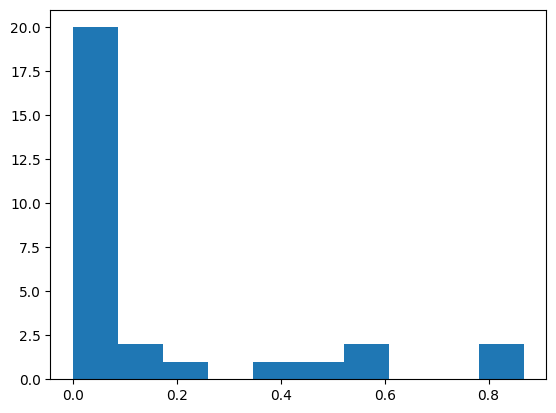

In [6]:
plt.hist(probs[probs>0])

In [37]:
def plot_probabilities_plotly(probabilities, plot_title, keep_first=None, log_scale=False, bins=None, show_plot=True, save_name=None):
    """
    Plot histogram of true suffix generation probabilities using plotly

    Args:
        probabilities (list[float]): list of probabilities
        plot_title (str): title of the plot
        keep_first (int): compute only for the first keep_first number of samples
        log_scale (bool): whether to make y-axis use a log scale
        show_plot (bool): whether to show the plot
        save_name (str): save path for plot (without extension); does not save unless save_name is specified
    """
    # Preprocess
    probabilities = torch.as_tensor(probabilities).flatten()[:keep_first]
    probabilities = probabilities[~probabilities.isnan()]

    # Compute bins    
    bin_edges = np.histogram_bin_edges(probabilities,bins="auto" if bins is None else bins)

    print(bin_edges)
    # Plot
    fig = make_subplots(rows=3, cols=1, row_heights=[0.1, 0.4, 0.55], shared_xaxes=True, vertical_spacing=0.02)

    # Rug plots
    fig.add_trace(go.Box(
        x=probabilities.numpy(), 
        marker_symbol='line-ns-open', 
        marker_color='#1f77b4',
        boxpoints='all',
        jitter=0,
        fillcolor='rgba(255,255,255,0)',
        line_color='rgba(255,255,255,0)',
        hoveron='points',
        showlegend=False,
    ), row=1, col=1)

    # Violin plots
    fig.add_trace(go.Violin(
        x=probabilities.numpy(), 
        line_color='#1f77b4',
        box_visible=True,
        meanline_visible=True,
        showlegend=False,
    ), row=2, col=1)

    # Histograms
    fig.add_trace(go.Histogram(
        x=probabilities.numpy(), 
        nbinsx=len(bin_edges)-1, 
        name='True Suffix Probabilities', 
        opacity=0.5, 
        marker_color='#1f77b4', 
        marker_line_color='black',
        marker_line_width=1.5,
        # xbins=dict(start=bin_edges[0], end=bin_edges[-1], size=len(bin_edges)-1)
    ), row=3, col=1)

    fig.update_layout(
        title=plot_title,
        width=800,
        height=800,
        xaxis3_title='True Suffix Probability',
        yaxis3_title='Frequency',
        yaxis=dict(showticklabels=False),
        yaxis2=dict(showticklabels=False),
        xaxis1=dict(showticklabels=False, minor=dict(showgrid=True, ticklen=0)),
        xaxis2=dict(showticklabels=False, minor=dict(ticklen=0, showgrid=True)),
        xaxis3=dict(showticklabels=True, showgrid=True, minor=dict(ticklen=0, showgrid=True)),
        yaxis3=dict(showticklabels=True, minor=dict(ticklen=0, showgrid=True), type='log' if log_scale else 'linear'),
        barmode='overlay'
    )

    if save_name is not None:
        fig.write_image(save_name + "_hist_plotly.png", scale=5)
        fig.write_image(save_name + "_hist_plotly.pdf", scale=5)
        fig.write_html(save_name + "_hist_plotly.html")
    if show_plot:
        fig.show()
    del fig
plot_probabilities_plotly(probs,"probs",log_scale=True)

[0.         0.07891408 0.15782817 0.23674225 0.31565634 0.39457042
 0.47348451 0.55239859 0.63131267 0.71022676 0.78914084 0.86805493]


# Ground Truth

In [2]:
pileval_train_dl_gt = torch.load("check_data/pileval_train_dl.pt")
pileval_val_dl_gt = torch.load("check_data/pileval_val_dl.pt")

In [3]:
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-70m-deduped")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [4]:
def load_val_pile(number=1000, percentage=None, start_index=0, seed=229, num_splits=1, tokenizer=None, window=2048, compensation_factor=2., uncopyright=False):
    """
    Loads the validation pile (NOT deduped), does an exact match deduplication and shuffling, 
    packs samples into 2048-sized chunks, and returns the specified number of splits. 

    Args:
        number (int): Number of samples
        percentage (float): Percentage of total samples (if number not specified). Default to None
        start_index (int): What index to start counting samples from. Default to 0
        seed (int): Random seed
        num_splits (int): Number of splits to separate data into. Usually set to 1 in most methods
        window (int): number of tokens to pack up to. If not packing, set to 0.
        compensation_factor (float): when packing, sample this times more samples to compensate for packing. Default to 2.
        uncopyright (bool): whether to load uncopyrighted version. Default to False
    
    Returns:
        list[list[str]]: List splits, each split is a list of text samples.
    """
    if uncopyright:
        dataset = load_dataset("the_pile_val.py", split="validation").shuffle(seed=seed)
    else:
        dataset = load_dataset("mit-han-lab/pile-val-backup", split="validation").shuffle(seed=seed)
    clip_len = number if percentage is None else int(len(dataset)*percentage)

    if window==0: # No packing
        dataset = dataset.select(range(start_index,start_index+clip_len))
        dataset = list(dict.fromkeys(entry["text"] for entry in dataset))[:clip_len]
    else:
        # Use a multiple of clip_len to ensure enough samples after packing
        if not (1<=int(clip_len*compensation_factor)<=len(dataset)):
            raise IndexError(f"Number or percentage out of bounds. You specified {int(clip_len*compensation_factor)} samples but there are only {len(dataset)} samples.")
        if tokenizer is None:
            raise ValueError("Must specify tokenizer to pack.")
        dataset = dataset.select(range(start_index,start_index+int(clip_len*compensation_factor)))
        dataset = dataset.map(lambda x: {"tokens": tokenizer(x["text"])["input_ids"]}, remove_columns=["text","meta"])["tokens"]

        # Get tokens for everything, and add EOS_token between examples
        collated_docs_with_eos_split = []
        for item in tqdm(dataset):
            collated_docs_with_eos_split += item + [tokenizer.eos_token_id]

        # Turn tokens back into strings. 
        dataset = []
        for i in tqdm(range(int(math.ceil(len(collated_docs_with_eos_split) / window)))):
            dataset.append(tokenizer.decode(collated_docs_with_eos_split[window * i:window * (i+1)]))
        dataset = dataset[:clip_len]
        if len(dataset)!=clip_len:
            print("WARNING: Packing resulted in less samples than expected!!!")
    splits = [dataset[i * len(dataset)//num_splits : (i+1) * len(dataset) // num_splits] for i in range(num_splits)]

    return splits

In [28]:
# def load_val_pile(number=1000, percentage=None, start_index=0, seed=229, num_splits=1, tokenizer=None, window=2048, min_length=None, max_length=None, truncate=None, compensation_factor=2., uncopyright=False):
#     """
#     Loads the validation pile (NOT deduped), does an exact match deduplication and shuffling, 
#     packs samples into 2048-sized chunks, and returns the specified number of splits. 

#     Args:
#         number (int): Number of samples
#         percentage (float): Percentage of total samples (if number not specified). Default to None
#         start_index (int): What index to start counting samples from. Default to 0
#         seed (int): Random seed
#         num_splits (int): Number of splits to separate data into. Usually set to 1 in most methods
#         window (int): number of tokens to pack up to. If not packing, set to 0.
#         compensation_factor (float): when packing, sample this times more samples to compensate for packing. Default to 2.
#         uncopyright (bool): whether to load uncopyrighted version. Default to False
    
#     Returns:
#         list[list[str]]: List splits, each split is a list of text samples.
#     """
#     if uncopyright:
#         dataset = load_dataset("the_pile_val.py", split="validation").shuffle(seed=seed)
#     else:
#         dataset = load_dataset("mit-han-lab/pile-val-backup", split="validation").shuffle(seed=seed)
    
#     # First clip with compensation to account for adjustments in preprocessing
#     clip_len = number if percentage is None else int(len(dataset)*percentage)
#     if not (1<=int(clip_len*compensation_factor)<=len(dataset)):
#         raise IndexError(f"Number or percentage out of bounds. You specified {int(clip_len*compensation_factor)} samples but there are only {len(dataset)} samples.")
#     dataset = dataset.select(range(start_index,start_index+int(clip_len*compensation_factor)))

#     # Preprocessing
#     if window==0: # Don't pack
#         dataset = list(dict.fromkeys(entry["text"] for entry in dataset))[:clip_len]
#         dataset.filter(lambda x: x)
#     else: # Pack
#         dataset = dataset.map(lambda x: {"tokens": tokenizer(x["text"])["input_ids"]}, remove_columns=["text","meta"])["tokens"]

#         # Get tokens for everything, and add EOS_token between examples
#         collated_docs_with_eos_split = []
#         for item in tqdm(dataset):
#             collated_docs_with_eos_split += item + [tokenizer.eos_token_id]

#         # Turn tokens back into strings. 
#         dataset = []
#         for i in tqdm(range(int(math.ceil(len(collated_docs_with_eos_split) / window)))):
#             dataset.append(tokenizer.decode(collated_docs_with_eos_split[window * i:window * (i+1)]))
#         dataset = dataset[:clip_len]
#         if len(dataset)!=clip_len:
#             print("WARNING: Packing resulted in less samples than expected!!!")
#     splits = [dataset[i * len(dataset)//num_splits : (i+1) * len(dataset) // num_splits] for i in range(num_splits)]

#     return splits

In [ ]:
def load_val_pile_for_ft(number=1000, percentage=None, start_index=0, seed=229, window=2048, compensation_factor=2.):
    val_data = load_val_pile(number=number, percentage=percentage, start_index=start_index, seed=seed, num_splits=2, window=window, compensation_factor=compensation_factor)
    
    
    # train_data, val_data = load_val_pile(number=number, percentage=percentage, start_index=start_index, seed=seed, num_splits=2, window=window, compensation_factor=compensation_factor)
    # # Filter to 1000-2000 characters
    # train_data = list(filter(lambda x: 1000<=len(x)<=2000, train_data))
    # val_data = list(filter(lambda x: 1000<=len(x)<=2000, val_data))
    # print(train_data)

load_val_pile_for_ft(number=30000,window=0,seed=31415)
    # # Tokenize
    # tokenized = []
    # minlentokens = 100000

    # for a in train_arr:
    #     rep = tokenizer(a)
    #     tokenized.append(rep)
    #     if len(rep['input_ids']) < minlentokens:
    #         print(f"New Min: {len(rep['input_ids'])}") # ensure all > 100 tokens so splittable
    #         minlentokens = min(minlentokens, len(rep['input_ids']))

    # print("This means that there are 100+ tokens in all of the strings!")

    # # Prefixes/Suffixes
    # prefixes = []
    # suffixes = []
    # for token_rep in tokenized:
    #     first_50 = token_rep['input_ids'][:50]
    #     next_50 = token_rep['input_ids'][50:100]
    #     prefixes.append(first_50)
    #     suffixes.append(next_50)

    # pre_var = np.array(prefixes).astype(np.int64)
    # suf_var = np.array(suffixes).astype(np.int64)

    # np.save("final_data/pile_val_ft/prefixes_pileval_train.npy", pre_var)
    # np.save("final_data/pile_val_ft/suffixes_pileval_train.npy", suf_var)



In [5]:
train_data, val_data = load_val_pile(number=30000, seed=31415, num_splits=2, window=0, uncopyright=True)

/n/home13/jasonwang1/.conda/envs/llm-privacy/lib/python3.10/site-packages/datasets/load.py:926: FutureWarning: The repository for the_pile_val contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at the_pile_val.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
Repo card metadata block was not found. Setting CardData to empty.


In [6]:
train_data = [x[:2000] for x in train_data if len(x)>=1000]
val_data = [x[:2000] for x in val_data if len(x)>=1000]

In [7]:
train_tokens = tokenizer(train_data,max_length=100,truncation=True)

In [9]:
type(train_tokens["input_ids"])

list

In [9]:
val_data = load_val_pile(number=30000, seed=31415, num_splits=1, window=0, uncopyright=True)

/n/home13/jasonwang1/.conda/envs/llm-privacy/lib/python3.10/site-packages/datasets/load.py:926: FutureWarning: The repository for the_pile_val contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at the_pile_val.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
Repo card metadata block was not found. Setting CardData to empty.


Generating validation split: 0 examples [00:00, ? examples/s]

In [15]:
train_arr = vdata_we_want[:10934]
val_arr = vdata_we_want[10934:]

In [25]:
vdata_we_want_a = [x[:2000] for x in val_data if len(x)>=1000]

In [26]:
vdata_we_want_a==vdata_we_want

False

21849


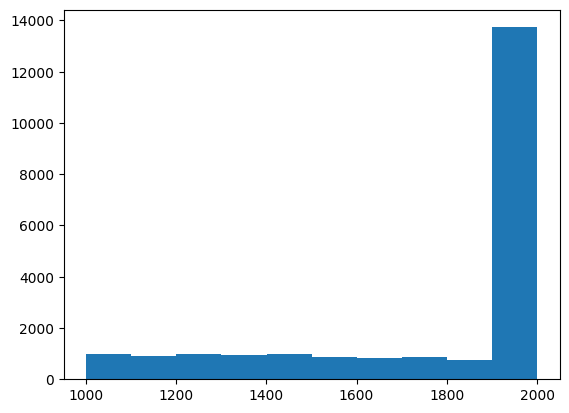

In [14]:
# Filter
vdata_we_want = []
for ent in val_data:
    if len(ent) > 1000:
        if len(ent) > 2000:
            vdata_we_want.append(ent[:2000])
        else:
            vdata_we_want.append(ent)

print(len(vdata_we_want))
plt.hist([len(a) for a in vdata_we_want]);

In [37]:
# Make tokenized

tokenized = []
minlentokens = 100000

for a in vdata_we_want[:10934]:
    rep = tokenizer(a)
    tokenized.append(rep)
    if len(rep['input_ids']) < minlentokens:
        print(f"New Min: {len(rep['input_ids'])}") # ensure all > 100 tokens so splittable
        minlentokens = min(minlentokens, len(rep['input_ids']))

print("This means that there are 100+ tokens in all of the strings!")

# Prefixes/Suffixes

prefixes = []
suffixes = []

for token_rep in tokenized:
    first_50 = token_rep['input_ids'][:50]
    next_50 = token_rep['input_ids'][50:100]
    prefixes.append(first_50)
    suffixes.append(next_50)

pre_var = np.array(prefixes).astype(np.int64)
suf_var = np.array(suffixes).astype(np.int64)


New Min: 251
New Min: 234
New Min: 195
New Min: 191
New Min: 189
New Min: 185
New Min: 176
New Min: 169
New Min: 164
This means that there are 100+ tokens in all of the strings!


In [38]:
pre_var

array([[33958,  6932,  6979, ...,  6242,   285, 14854],
       [12432,  4638,   641, ...,   747,  4735,   326],
       [   66,   428,   854, ...,  1093,    10,   559],
       ...,
       [    5,  2511,    15, ...,  9023,  1620,   281],
       [    4,  8209,   495, ...,   933,   608, 14840],
       [ 1552, 16485,   369, ..., 31323,  1615, 26002]])

In [39]:
suf_var

array([[ 6880,   273,   253, ...,   844,  7091,   253],
       [  352,   310,  9840, ...,  1440,   793,    27],
       [ 3383,    21,  5789, ...,    11,    87,   428],
       ...,
       [ 3894,   634,  1491, ...,  8911,  2006, 21400],
       [  187,    19,   337, ...,    18,   470,   470],
       [19926,    66,    13, ...,  6661,    15,   380]])